In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split


In [2]:
original_df=pd.read_csv('./train_age_dataset.csv')
original_df.head(5)

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,405231,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,57867,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,272618,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,251123,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


In [3]:
original_df.shape

(488877, 27)

### I tried logistic regression, it gives score arround 0.6, so lets try something else

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(original_df.drop(columns=['age_group']), original_df['age_group'], test_size=0.01)

In [ ]:
dt=DecisionTreeClassifier().fit(X_train, y_train)
f1_train=f1_score(y_train, dt.predict(X_train), average='weighted')
f1_test=f1_score(y_test, dt.predict(X_test), average='weighted')
print(f1_train)
print(f1_test)

### Looks like its overfitting, but still gives decent test score 
### let's fix the overfitting

In [ ]:
F1=[]
for i in range(10,25):
    dt=DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    f1tr=f1_score(y_train, dt.predict(X_train), average='weighted')
    f1te=f1_score(y_test, dt.predict(X_test), average='weighted')
    F1.append((i,f1tr,f1te))
F1

#### Lets convert gender to 1s and 0s and tier to -1,0,1

In [ ]:
orig=original_df.copy()
orig['gender']-=1
orig['tier']-=2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(orig.drop(columns=['age_group']), orig['age_group'], test_size=0.01)

In [ ]:
dt=DecisionTreeClassifier().fit(X_train, y_train)
f1_train=f1_score(y_train, dt.predict(X_train), average='weighted')
f1_test=f1_score(y_test, dt.predict(X_test), average='weighted')
print(f1_train)
print(f1_test)

In [ ]:
F1=[]
for i in range(10,25):
    dt=DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    f1tr=f1_score(y_train, dt.predict(X_train), average='weighted')
    f1te=f1_score(y_test, dt.predict(X_test), average='weighted')
    F1.append((i,f1tr,f1te))
F1

#### editing gender and tier gives better results
#### looks like max depth arround 15 gives best results
### Now lets use something powerful

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
dt=RandomForestClassifier(max_depth=15).fit(X_train, y_train)
f1tr=f1_score(y_train, dt.predict(X_train), average='weighted')
f1te=f1_score(y_test, dt.predict(X_test), average='weighted')
print(f1tr)
print(f1te)
#trianing score 0.84
#trianing score 0.77
#submission 1

#### tested both original and modified datasets and also diffrent max depth but this was best
#### also it neither looks like underfitting, nor overfitting
### Looks like this is best it can do

### Lets try boosting techniques
#### gradient boosting took lots of time to train, so eleminating it.
#### ada boost don't give good result
#### lets try whats remaining

In [ ]:
import xgboost as xgb

In [ ]:
dt=xgb.XGBClassifier(learning_rate=0.01).fit(X_train, y_train)
f1tr=f1_score(y_train, dt.predict(X_train), average='weighted')
f1te=f1_score(y_test, dt.predict(X_test), average='weighted')
print(f1tr)
print(f1te)
#trianing score 0.76
#trianing score 0.76

#### wow, its so much underfitting, still gives decent result
#### The modified dataset and orignal dataset gives almost same outcome 
### Lets tune hyperparametes

In [ ]:
#modified dataset
dt=xgb.XGBClassifier(learning_rate=0.1,n_jobs=-1,n_estimators=500).fit(X_train, y_traim)
f1tr=f1_score(y_trainm, dt.predict(X_trainm), average='weighted')
f1te=f1_score(y_testm, dt.predict(X_testm), average='weighted')
print(f1tr)
print(f1te)
#training score 0.8354221172849708
#testing score 0.7978395016967137
#submission 2

In [ ]:
#original dataset
dt=xgb.XGBClassifier(learning_rate=0.1,n_jobs=-1,n_estimators=500).fit(X_train, y_train)
f1tr=f1_score(y_trainm, dt.predict(X_trainm), average='weighted')
f1te=f1_score(y_testm, dt.predict(X_testm), average='weighted')
print(f1tr)
print(f1te)
#training score 0.8352755897937276
#testing score 0.8059791026972337
#submission 3

#### i have tried LightGBM, but it doesn't work well
### I also trued to drop unnamed:0 and user id, but it gave worse results
### so lets improve xgb

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
model=ExtraTreesClassifier()
model.fit(X_trainm,y_trainm)
important_features=pd.Series(model.feature_importances_,index=X_trainm.columns)

In [ ]:
top21=list(important_features.nlargest(21).index)
top21

#apparently 21 worked best for me

In [ ]:
x_top=X_train[top21]
x_teop=X_test[top21]

dt=xgb.XGBClassifier(learning_rate=0.5,n_jobs=-1,n_estimators=500).fit(x_top, y_train)
f1tr=f1_score(y_train, dt.predict(x_top), average='weighted')
f1te=f1_score(y_test, dt.predict(x_teop), average='weighted')
print(f1tr)
print(f1te)
#modified worked best
#training 0.9203477314578121
#testing 0.8093196526468691
#submission 4 

## The above submission was the final one which help me get rank 28 and score 80.8
### I did more modifications hoping to get better score
### Lets see them

In [5]:
original_df.describe()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
count,488877.000000,4.888770e+05,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,...,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000
mean,271605.981815,4.236096e+07,1.975382,1.213037,0.082233,0.347520,0.403049,0.739748,0.000277,0.000981,...,0.391013,0.002009,0.074353,0.066927,0.032855,0.141705,0.150401,0.158382,164.765782,1.741643
std,156808.138002,1.821664e+07,0.430707,0.409454,2.467781,0.816334,0.925291,3.075954,0.012221,0.020381,...,0.905303,0.030561,0.211094,0.174791,0.193962,0.402612,0.451999,0.502065,981.988886,1.088559
min,0.000000,2.700000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,135779.000000,3.537599e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.040650,0.000000,0.000000,0.002265,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,271560.000000,4.336270e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.124031,0.000000,0.003968,0.015873,0.000000,0.011834,0.014563,0.015873,0.000000,1.000000
75%,407431.000000,5.370523e+07,2.000000,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.364486,0.000000,0.060000,0.059016,0.000000,0.117188,0.118644,0.122396,178.666667,2.000000
max,543196.000000,7.904203e+07,3.000000,2.000000,895.304000,4.000000,4.000000,624.000000,2.333333,3.000000,...,75.662281,8.196850,17.201754,18.756140,19.612903,27.905983,45.083333,55.153846,39304.000000,4.000000


### You can see even though many columns are normalised, there are may outliers. lets make list of such columns

In [8]:
shady_columns=['following_rate','max_repetitive_punc', 'punctuations_per_action','number_of_words_per_action','avgt2','slot1_trails_watched_per_day','slot2_trails_watched_per_day','slot3_trails_watched_per_day','slot4_trails_watched_per_day']

### lets visalise them

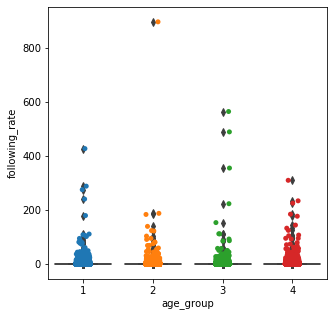

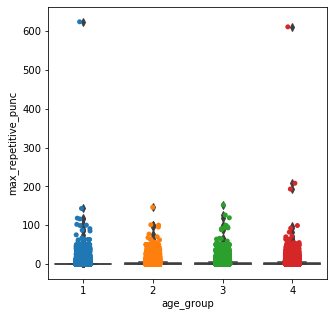

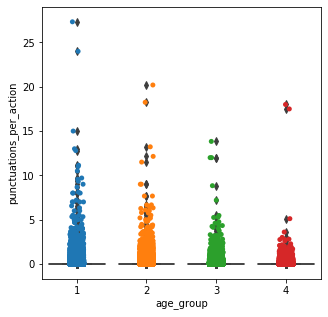

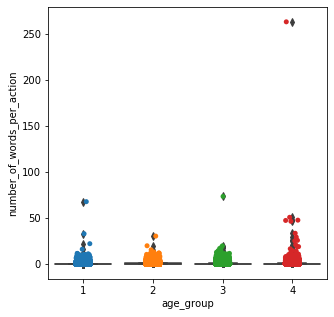

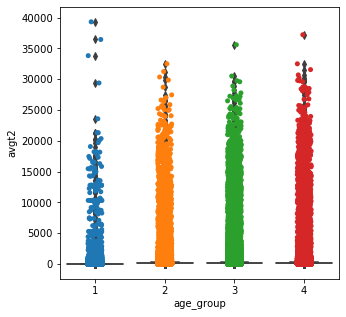

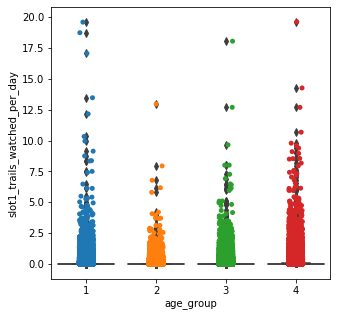

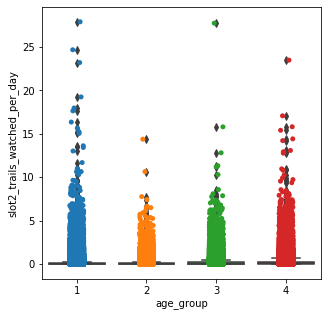

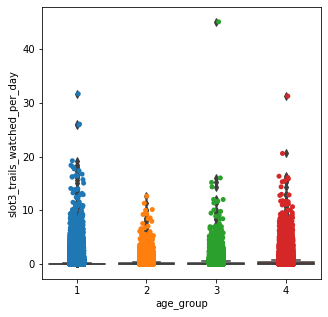

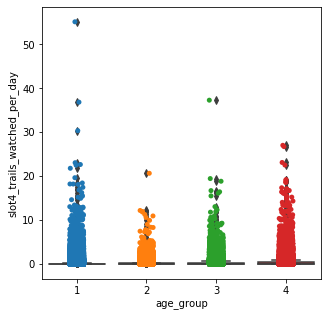

In [9]:
for shad in shady_columns:
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.boxplot(x="age_group", y = shad, data=original_df)
    ax = sns.stripplot(x = "age_group", y = shad, data=original_df)

## lets remove all these outliers

In [12]:
trimorf=original_df[original_df['following_rate']<150]
print((trimorf.shape))
trimorf=trimorf[trimorf['max_repetitive_punc']<100]
print((trimorf.shape))
trimorf=trimorf[trimorf['punctuations_per_action']<10]
print((trimorf.shape))
trimorf=trimorf[trimorf['number_of_words_per_action']<50]
print((trimorf.shape))
trimorf=trimorf[trimorf['avgt2']<30000]
print((trimorf.shape))
trimorf=trimorf[trimorf['slot1_trails_watched_per_day']<7.5]
print((trimorf.shape))
trimorf=trimorf[trimorf['slot1_trails_watched_per_day']<10]
print((trimorf.shape))
trimorf=trimorf[trimorf['slot1_trails_watched_per_day']<19]
print((trimorf.shape))
trimorf=trimorf[trimorf['slot1_trails_watched_per_day']<20]
print((trimorf.shape))

(488859, 27)
(488843, 27)
(488825, 27)
(488821, 27)
(488808, 27)
(488773, 27)
(488773, 27)
(488773, 27)
(488773, 27)


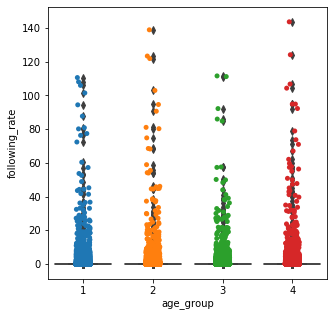

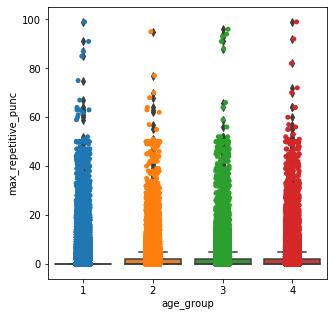

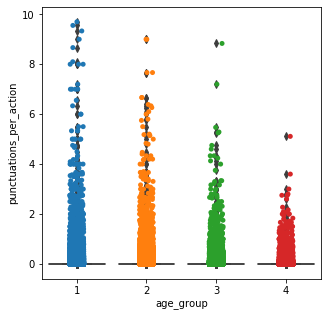

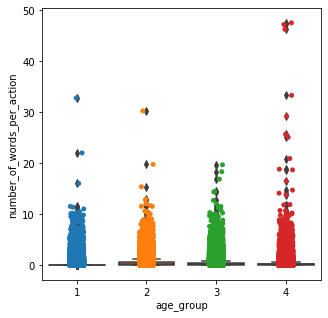

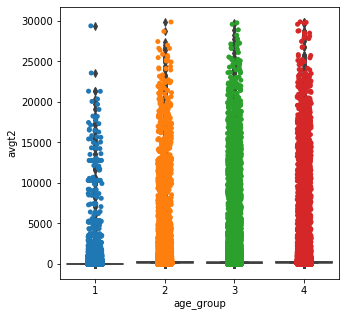

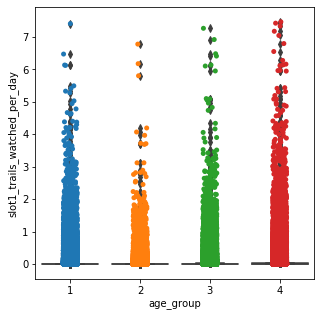

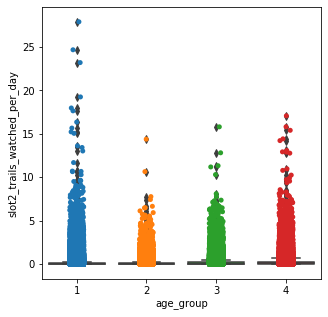

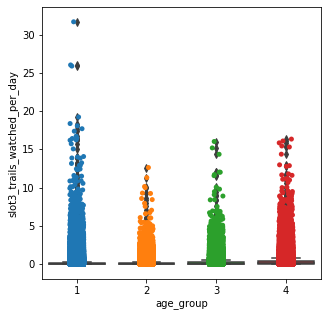

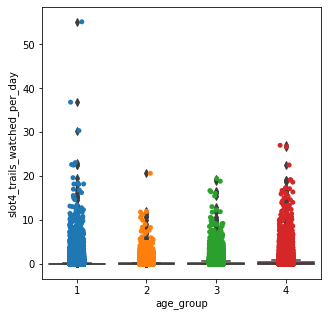

In [13]:
for shad in shady_columns:
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.boxplot(x="age_group", y = shad, data=trimorf)
    ax = sns.stripplot(x = "age_group", y = shad, data=trimorf)

### I have removed most of extreme outliers, I didn't wanted to remove absolutely all.
## Now I will just repeat all the above sumisson steps